# **Reliability and Validity Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import cronbach_alpha
import scipy.stats as stats

# Load your cleaned data
df = pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

# Set up aesthetics for plots
plt.style.use('seaborn-v0_8-whitegrid')  # Updated style name
sns.set_palette('viridis')

### **Identify Construct Groups**

In [2]:
# Define the items that belong to each construct
constructs = {
    'Perceived Ease of Use (PEOU)': [
        # Navigation
        'peou_navigation_1',
        'peou_navigation_2',
        # Learning
        'peou_learning_1',
        'peou_learning_2',
        # Instructions
        'peou_instructions_1',
        'peou_instructions_2',
        # Error Handling
        'peou_error_1',
        'peou_error_2',
        # Response Time
        'peou_response_1',
        'peou_response_2'
    ],
    
    'Perceived Usefulness (PU)': [
        # Product Range
        'pu_product_1',
        'pu_product_2',
        # Convenience
        'pu_convenience_1',
        'pu_convenience_2',
        # Cost-effectiveness
        'pu_cost_1',
        'pu_cost_2',
        # Information Access
        'pu_info_1',
        'pu_info_2',
        # Personalization
        'pu_personalization_1',
        'pu_personalization_2'
    ],
    
    'Structural Assurance (SA)': [
        # Privacy
        'sa_privacy_1',
        'sa_privacy_2',

        # Payment Security
        'sa_payment_1',
        'sa_payment_2',

        # Transparency
        'sa_policy_1',
        'sa_policy_2'

    ],
    
    'Social Influence (SI)': [
        # Word of Mouth
        'si_wom_1',
        'si_wom_2',

        # Social Media Influence
        'si_social_media_1',
        'si_social_media_2',

        # Reviews & Ratings
        'si_reviews_1',
        'si_reviews_2',

        # Social Proof
        'si_social_proof_1',
        'si_social_proof_2',

        # Normative Pressure
        'si_normative_1',
        'si_normative_2',

        # Information Sharing
        'si_sharing_1',
        'si_sharing_2'

    ],
    
    'Attitude': [
        'att_positive_1',
        'att_positive_2'

    ],
    
    'Perceived Risk': [
        'risk_security_1',
        'risk_authenticity_1'
        
    ],
    
    'Online Purchase Intention': [
        'opi_satisfaction',
        'opi_behavior_change',
        'opi_convenience',
        'opi_value',
        'opi_purchased?'
    ]
}

### **Compute Reliability Analysis**

In [3]:
def analyze_construct_reliability(df, construct_name, items):
    """
    Analyze reliability of a construct by computing Cronbach's alpha and inter-item correlations
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataset containing the items
    construct_name : str
        Name of the construct being analyzed
    items : list
        List of column names corresponding to items in the construct
        
    Returns:
    --------
    dict
        Dictionary containing reliability metrics
    """
    print(f"\n{'='*80}\n{construct_name}\n{'='*80}")
    
    # Check if all items are present in the dataframe
    missing_items = [item for item in items if item not in df.columns]
    if missing_items:
        print(f"Warning: The following items are missing from the dataframe: {missing_items}")
        items = [item for item in items if item in df.columns]
    
    if len(items) < 2:
        print("Error: Need at least 2 items to calculate reliability")
        return None
    
    # Extract the relevant columns
    construct_df = df[items].copy()
    
    # Calculate Cronbach's alpha
    alpha, _ = cronbach_alpha(data=construct_df)
    print(f"Cronbach's Alpha: {alpha:.3f}")
    
    # Calculate inter-item correlations
    corr_matrix = construct_df.corr()
    
    # Calculate average inter-item correlation
    corr_values = corr_matrix.values
    # Get the indices of the upper triangle excluding the diagonal
    upper_indices = np.triu_indices_from(corr_values, k=1)
    avg_corr = np.mean(corr_values[upper_indices])
    
    print(f"Average Inter-Item Correlation: {avg_corr:.3f}")
    
    # Print reliability assessment
    if alpha >= 0.9:
        alpha_assessment = "Excellent"
    elif alpha >= 0.8:
        alpha_assessment = "Good"
    elif alpha >= 0.7:
        alpha_assessment = "Acceptable"
    elif alpha >= 0.6:
        alpha_assessment = "Questionable"
    elif alpha >= 0.5:
        alpha_assessment = "Poor"
    else:
        alpha_assessment = "Unacceptable"
    
    print(f"Reliability Assessment: {alpha_assessment}")
    
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title(f"{construct_name} - Inter-Item Correlation Matrix")
    plt.tight_layout()
    plt.savefig(f"../../outputs/reliability/{construct_name.replace(' ', '_')}_corr_matrix.png")
    plt.show()
    
    return {
        'construct': construct_name,
        'alpha': alpha,
        'avg_corr': avg_corr,
        'assessment': alpha_assessment,
        'n_items': len(items),
        'corr_matrix': corr_matrix
    }

### **Run the Analysis for All Constructs**


Perceived Ease of Use (PEOU)
Cronbach's Alpha: 0.894
Average Inter-Item Correlation: 0.460
Reliability Assessment: Good


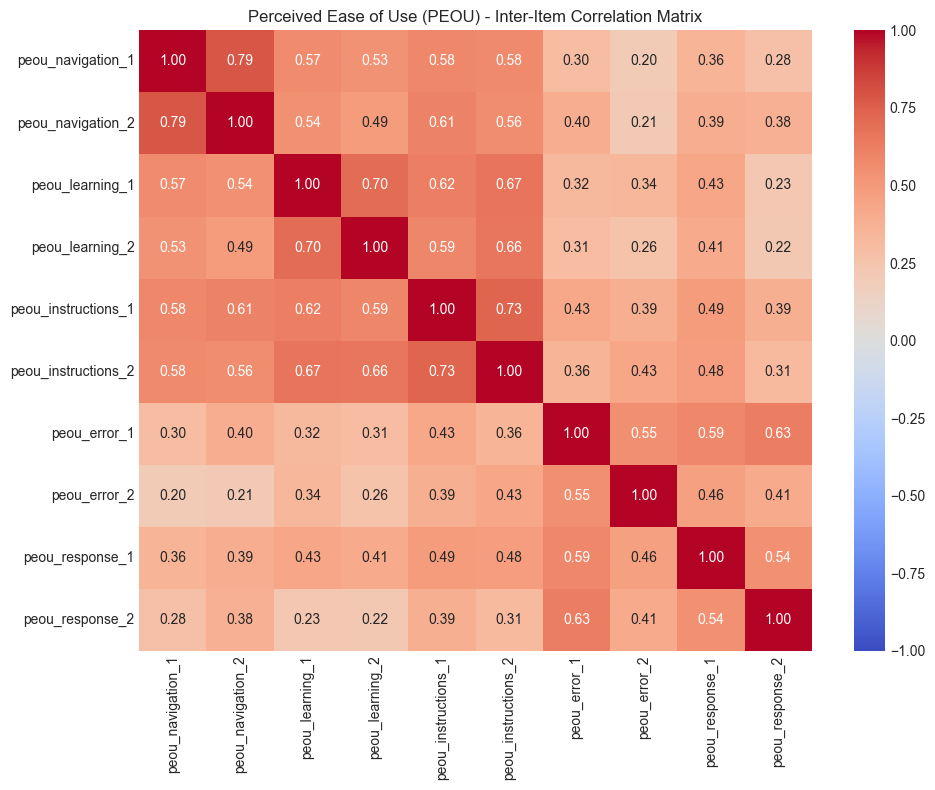


Perceived Usefulness (PU)
Cronbach's Alpha: 0.898
Average Inter-Item Correlation: 0.474
Reliability Assessment: Good


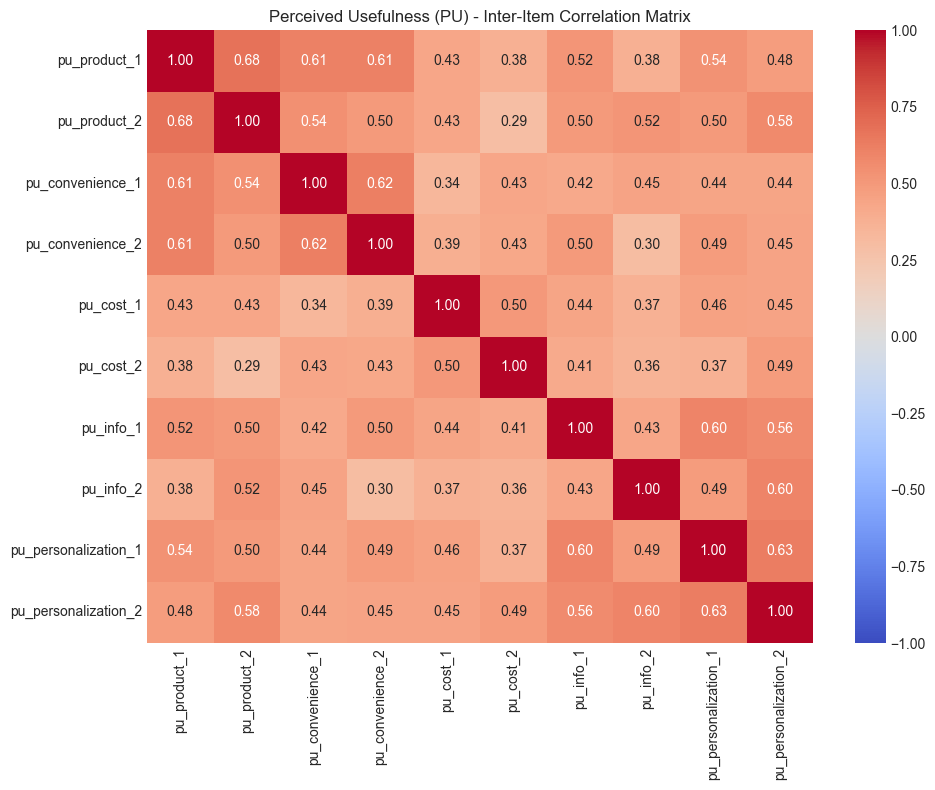


Structural Assurance (SA)
Cronbach's Alpha: 0.898
Average Inter-Item Correlation: 0.595
Reliability Assessment: Good


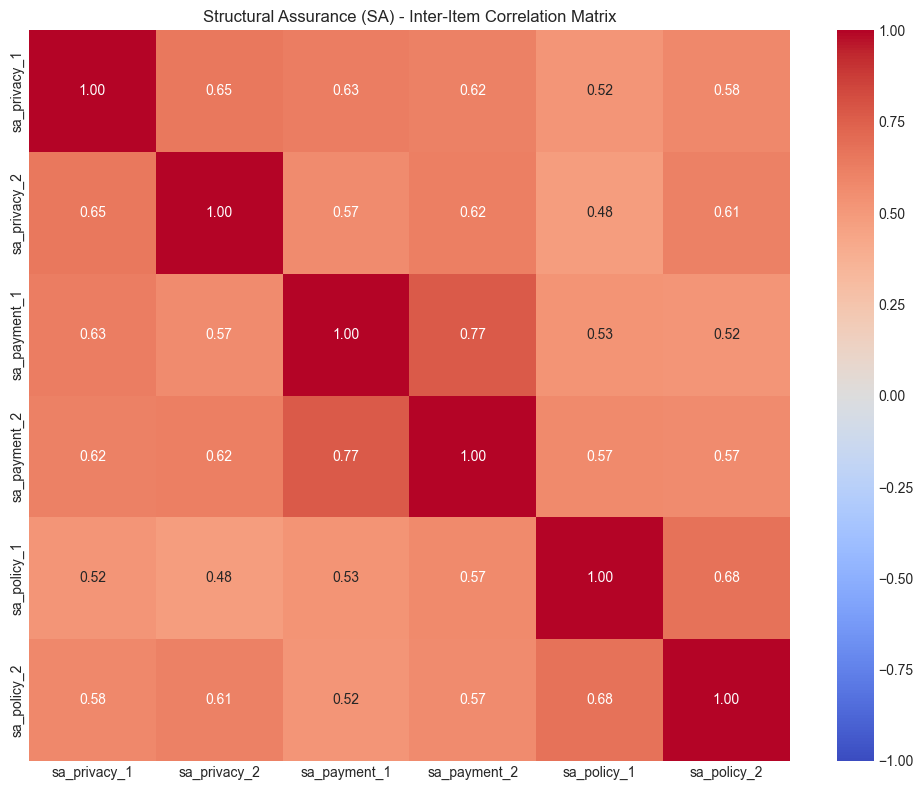


Social Influence (SI)
Cronbach's Alpha: 0.910
Average Inter-Item Correlation: 0.461
Reliability Assessment: Excellent


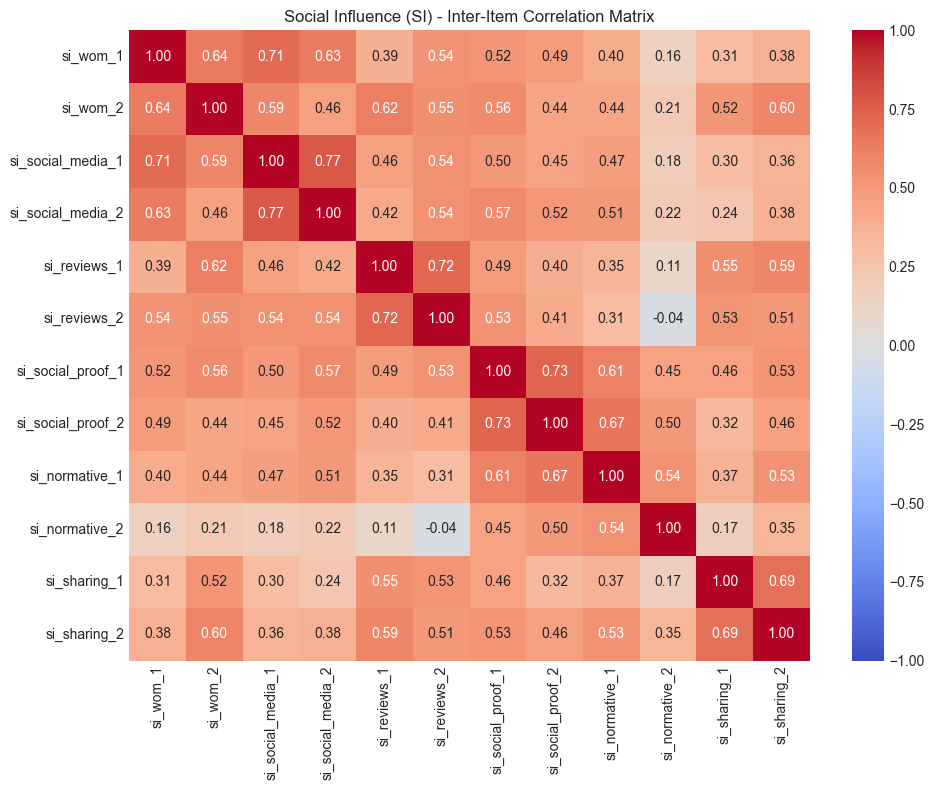


Attitude
Cronbach's Alpha: 0.514
Average Inter-Item Correlation: 0.349
Reliability Assessment: Poor


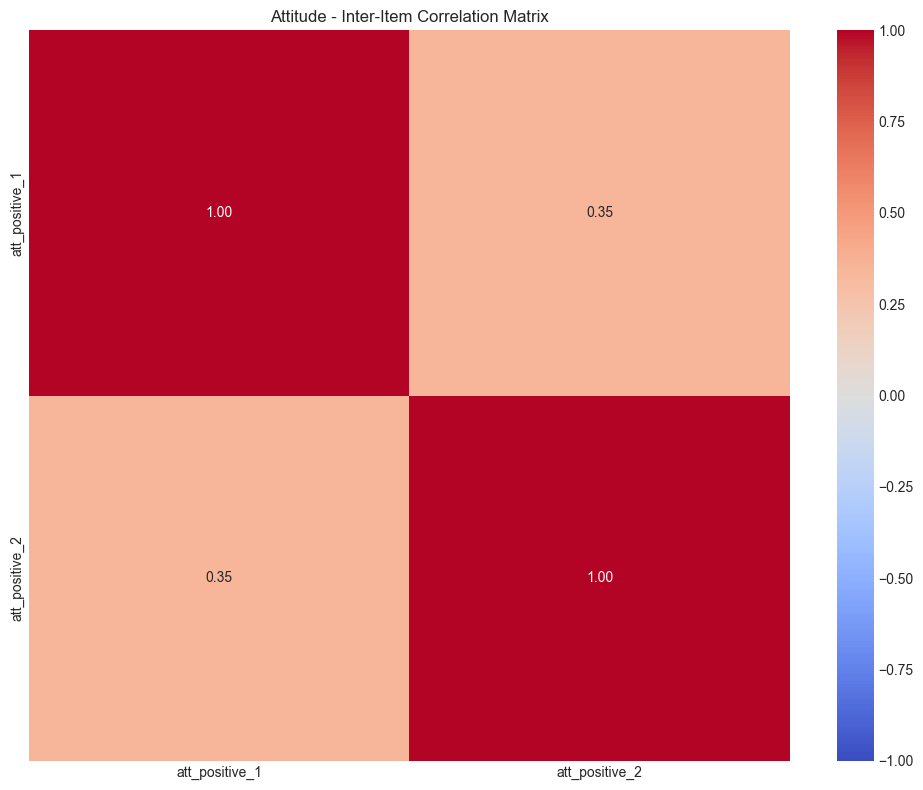


Perceived Risk
Cronbach's Alpha: 0.463
Average Inter-Item Correlation: 0.301
Reliability Assessment: Unacceptable


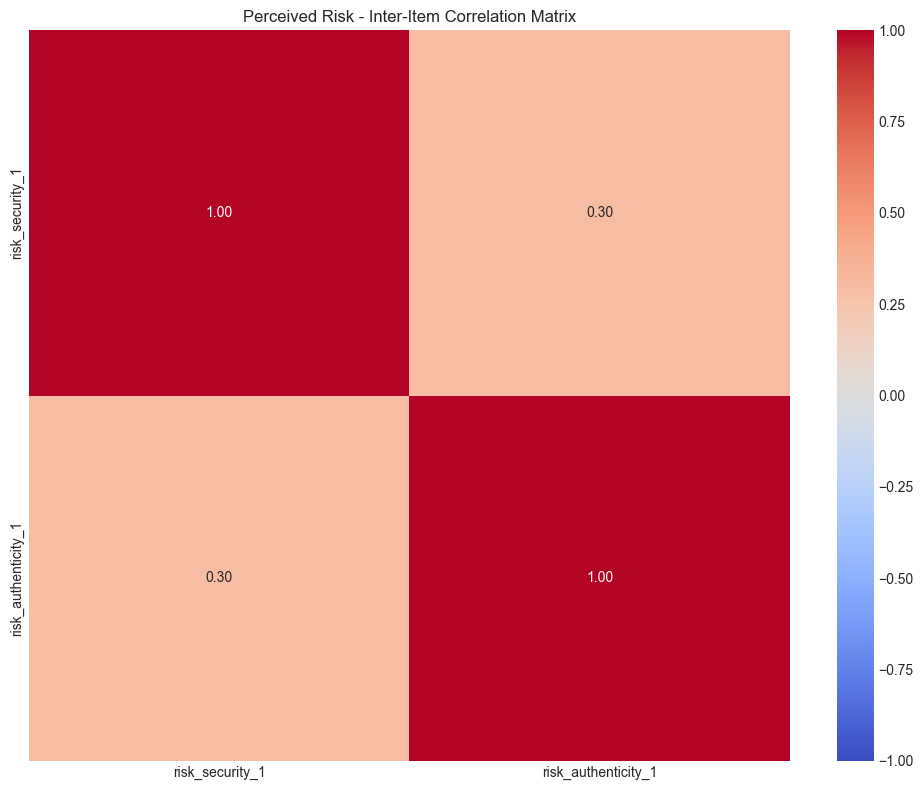


Online Purchase Intention
Cronbach's Alpha: 0.587
Average Inter-Item Correlation: 0.200
Reliability Assessment: Poor


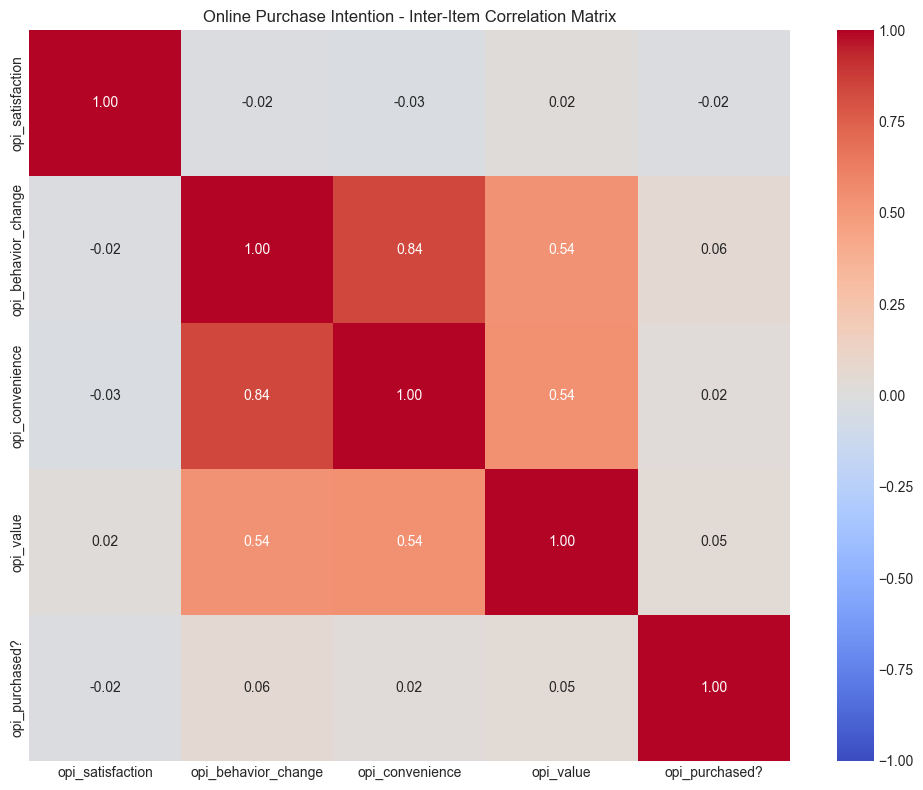



Summary of Construct Reliability Analysis:
                   construct  n_items    alpha  avg_corr   assessment
       Social Influence (SI)       12 0.909656  0.461362    Excellent
   Structural Assurance (SA)        6 0.897928  0.594745         Good
   Perceived Usefulness (PU)       10 0.897598  0.473818         Good
Perceived Ease of Use (PEOU)       10 0.893724  0.460413         Good
   Online Purchase Intention        5 0.586855  0.200337         Poor
                    Attitude        2 0.514479  0.349228         Poor
              Perceived Risk        2 0.462572  0.301288 Unacceptable


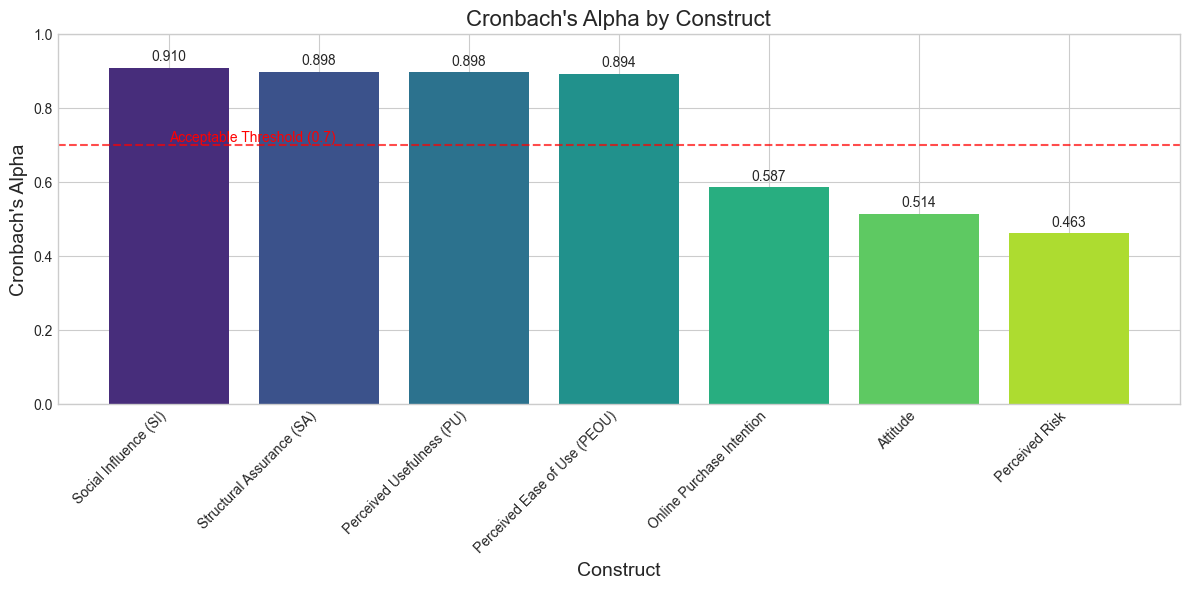

In [4]:
# Create a directory for saving outputs
import os
os.makedirs('../../outputs/reliability', exist_ok=True)

# Analyze reliability for each construct
results = []

for construct_name, items in constructs.items():
    result = analyze_construct_reliability(df, construct_name, items)
    if result:
        results.append(result)

# Create a summary table
summary_df = pd.DataFrame(results)
summary_df = summary_df[['construct', 'n_items', 'alpha', 'avg_corr', 'assessment']]
summary_df.sort_values('alpha', ascending=False, inplace=True)

# Display summary table
print("\n\nSummary of Construct Reliability Analysis:")
print("="*80)
print(summary_df.to_string(index=False))

# Save summary to CSV
summary_df.to_csv('../../outputs/reliability/reliability_summary.csv', index=False)

# Create a bar chart of Cronbach's Alpha values
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['construct'], summary_df['alpha'], color=sns.color_palette('viridis', len(summary_df)))

# Add a horizontal line at alpha = 0.7 (acceptable threshold)
plt.axhline(y=0.7, color='red', linestyle='--', alpha=0.7)
plt.text(0, 0.71, 'Acceptable Threshold (0.7)', color='red')

plt.title('Cronbach\'s Alpha by Construct', fontsize=16)
plt.xlabel('Construct', fontsize=14)
plt.ylabel('Cronbach\'s Alpha', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../../outputs/reliability/cronbachs_alpha_summary.png')
plt.show()

### **Validity Analysis**

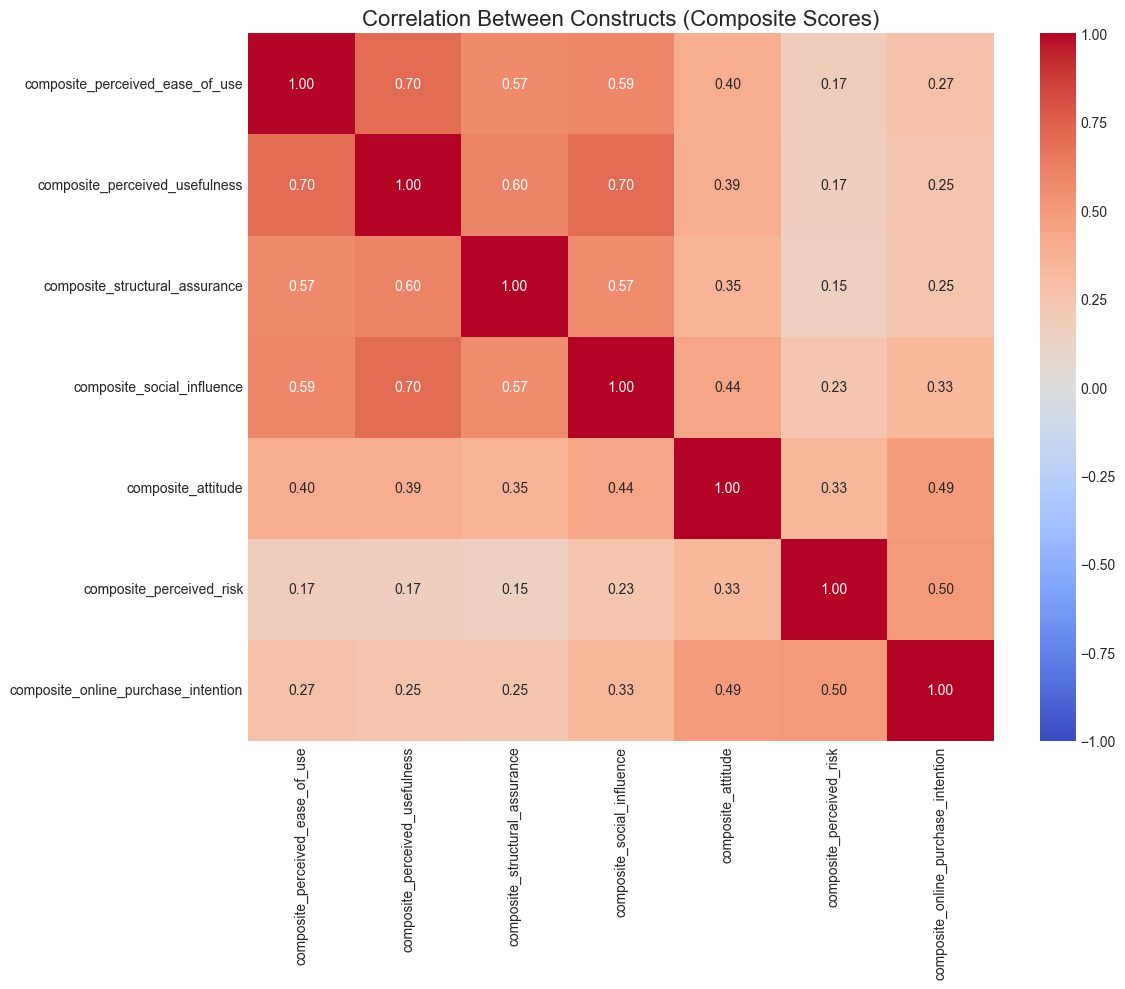


Validity Analysis:
Convergent Validity: Each construct should correlate highly with itself
Discriminant Validity: Each construct should correlate more with itself than with other constructs

PERCEIVED_EASE_OF_USE:
  Highest correlations with other constructs:
  - perceived_usefulness: 0.697
  - social_influence: 0.589
  - structural_assurance: 0.572

PERCEIVED_USEFULNESS:
  Highest correlations with other constructs:
  - social_influence: 0.702
  - perceived_ease_of_use: 0.697
  - structural_assurance: 0.603

STRUCTURAL_ASSURANCE:
  Highest correlations with other constructs:
  - perceived_usefulness: 0.603
  - perceived_ease_of_use: 0.572
  - social_influence: 0.569

SOCIAL_INFLUENCE:
  Highest correlations with other constructs:
  - perceived_usefulness: 0.702
  - perceived_ease_of_use: 0.589
  - structural_assurance: 0.569

ATTITUDE:
  Highest correlations with other constructs:
  - online_purchase_intention: 0.486
  - social_influence: 0.443
  - perceived_ease_of_use: 0.396

PERCE

In [5]:
# Analyze validity by examining correlations between constructs

# First, calculate composite scores for each construct
for construct_name, items in constructs.items():
    valid_items = [item for item in items if item in df.columns]
    if valid_items:
        # Create simplified construct name
        simple_name = construct_name.split('(')[0].strip().lower().replace(' ', '_')
        df[f'composite_{simple_name}'] = df[valid_items].mean(axis=1)

# Calculate correlations between composite scores
composite_cols = [col for col in df.columns if col.startswith('composite_')]
composite_corr = df[composite_cols].corr()

# Plot correlation heatmap for construct validity
plt.figure(figsize=(12, 10))
sns.heatmap(composite_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Constructs (Composite Scores)', fontsize=16)
plt.tight_layout()
plt.savefig('../../outputs/reliability/construct_validity.png')
plt.show()

# Assess convergent and discriminant validity
print("\nValidity Analysis:")
print("="*80)
print("Convergent Validity: Each construct should correlate highly with itself")
print("Discriminant Validity: Each construct should correlate more with itself than with other constructs")

for i, construct1 in enumerate(composite_cols):
    # Extract the construct name for better readability
    c1_name = construct1.replace('composite_', '')
    
    # Get this construct's correlation with others
    corrs = []
    for j, construct2 in enumerate(composite_cols):
        c2_name = construct2.replace('composite_', '')
        if i != j:  # Skip correlation with itself
            corrs.append((c2_name, composite_corr.iloc[i, j]))
    
    # Sort correlations
    corrs.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\n{c1_name.upper()}:")
    print(f"  Highest correlations with other constructs:")
    for name, corr in corrs[:3]:  # Top 3 correlations
        print(f"  - {name}: {corr:.3f}")

### **Factor Analysis**

c:\Users\npafe\Desktop\Sem_4\DS\Online_Purchase_Intention_Project\.venv\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
c:\Users\npafe\Desktop\Sem_4\DS\Online_Purchase_Intention_Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Factor Analysis Suitability Tests:
Bartlett's test of sphericity: chi-square=26715.687, p=0.000000
KMO Measure of Sampling Adequacy: 0.933
The data is suitable for factor analysis.


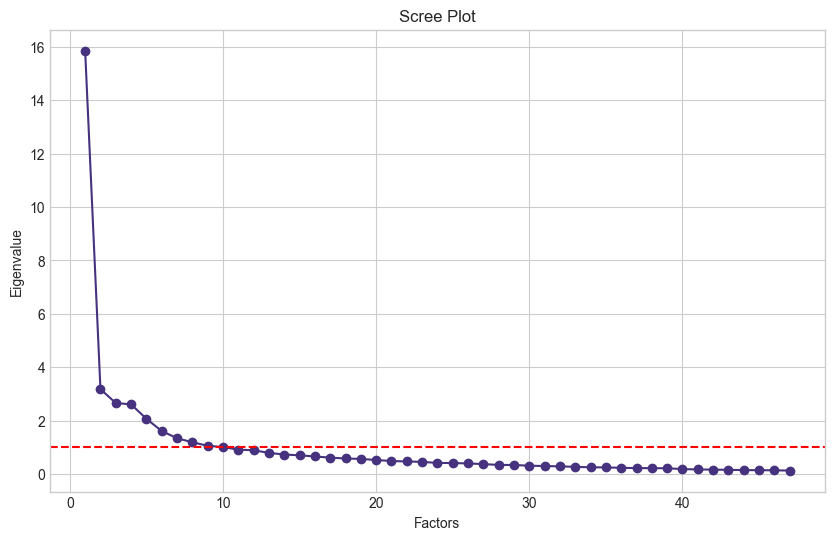

Suggested number of factors based on Kaiser criterion: 10

Factor Loadings (values < 0.3 are suppressed):
                      Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
peou_navigation_1     0.517972       NaN  0.514690       NaN       NaN   
peou_navigation_2     0.489321       NaN  0.530756       NaN       NaN   
peou_learning_1       0.747686       NaN       NaN       NaN       NaN   
peou_learning_2       0.705772       NaN       NaN       NaN       NaN   
peou_instructions_1   0.647239       NaN       NaN       NaN       NaN   
peou_instructions_2   0.725259       NaN       NaN       NaN       NaN   
peou_error_1               NaN       NaN       NaN       NaN       NaN   
peou_error_2               NaN       NaN       NaN       NaN       NaN   
peou_response_1       0.328908       NaN       NaN       NaN       NaN   
peou_response_2            NaN       NaN       NaN       NaN       NaN   
pu_product_1               NaN       NaN       NaN  0.630576       NaN   
pu_pro

c:\Users\npafe\Desktop\Sem_4\DS\Online_Purchase_Intention_Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


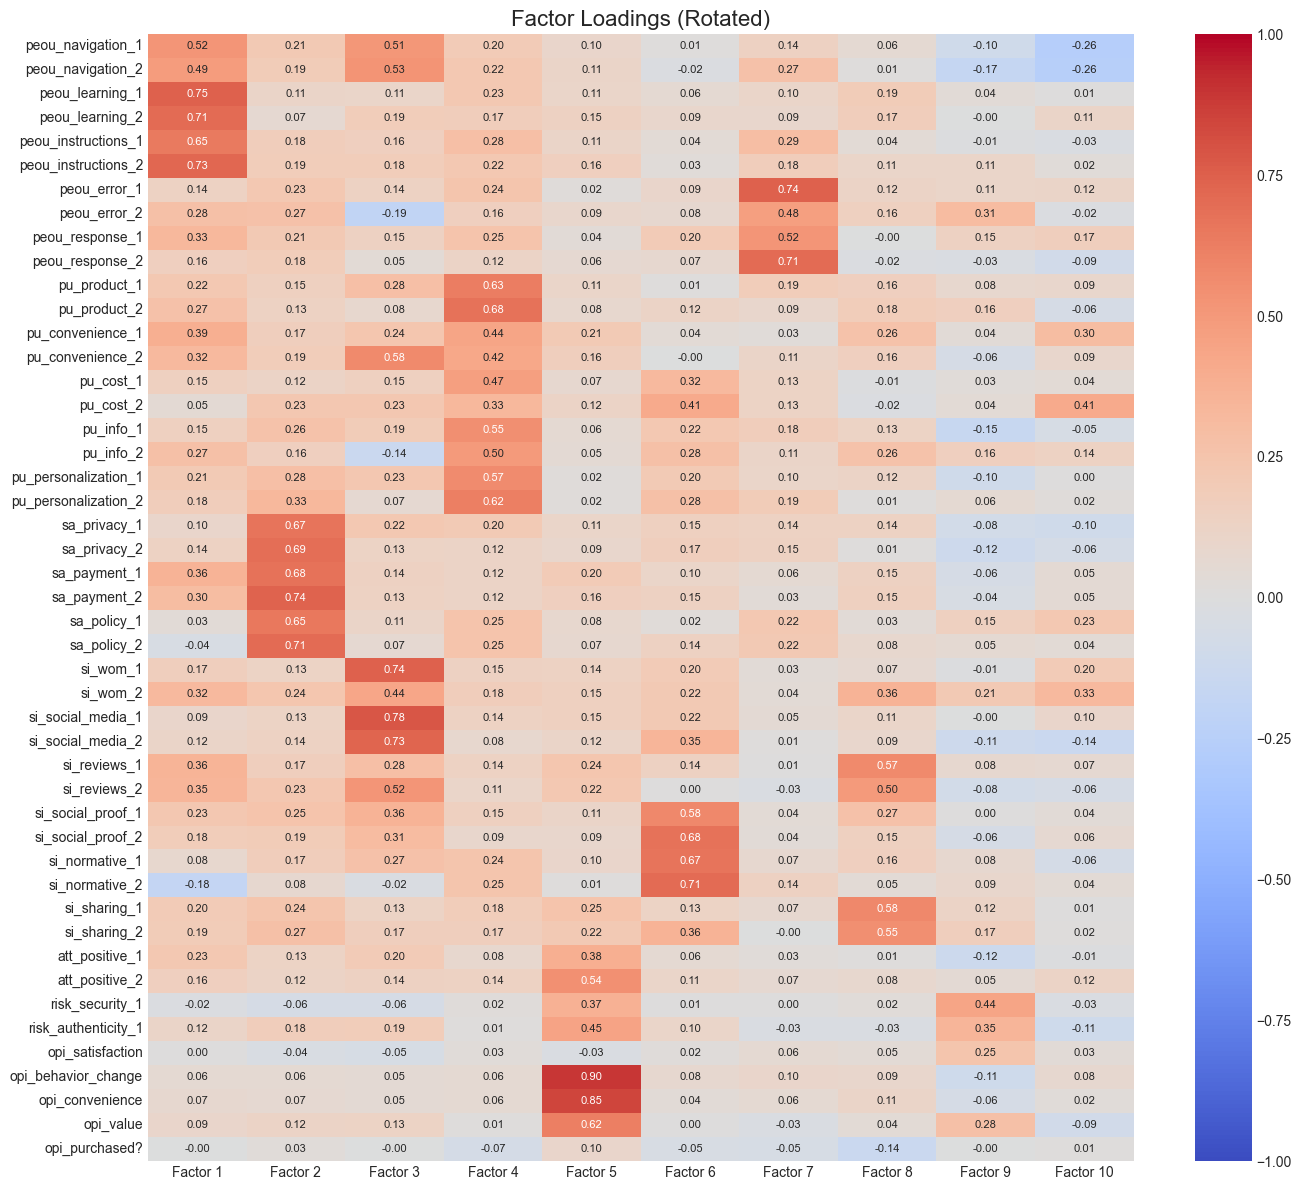

In [6]:
# Optional: Conduct Exploratory Factor Analysis (EFA)
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Combine all items for factor analysis
all_items = []
for items in constructs.values():
    all_items.extend([item for item in items if item in df.columns])

# Extract data for factor analysis
factor_df = df[all_items].copy()

# Check if factor analysis is appropriate
chi_square_value, p_value = calculate_bartlett_sphericity(factor_df)
kmo_all, kmo_model = calculate_kmo(factor_df)

print("\nFactor Analysis Suitability Tests:")
print("="*80)
print(f"Bartlett's test of sphericity: chi-square={chi_square_value:.3f}, p={p_value:.6f}")
print(f"KMO Measure of Sampling Adequacy: {kmo_model:.3f}")

if p_value < 0.05 and kmo_model > 0.6:
    print("The data is suitable for factor analysis.")
    
    # Determine optimal number of factors using scree plot
    fa = FactorAnalyzer(n_factors=len(all_items), rotation=None)
    fa.fit(factor_df)
    
    # Get eigenvalues
    ev, v = fa.get_eigenvalues()
    
    # Plot scree plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(1, len(ev) + 1), ev)
    plt.plot(range(1, len(ev) + 1), ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.grid(True)
    plt.savefig('../../outputs/reliability/scree_plot.png')
    plt.show()
    
    # Determine number of factors based on eigenvalues > 1
    n_factors = sum(ev > 1)
    print(f"Suggested number of factors based on Kaiser criterion: {n_factors}")
    
    # Run factor analysis with the suggested number of factors
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(factor_df)
    
    # Get factor loadings
    factor_loadings = fa.loadings_
    loadings_df = pd.DataFrame(factor_loadings, index=all_items, 
                              columns=[f'Factor {i+1}' for i in range(n_factors)])
    
    # Print factor loadings (showing only significant loadings > 0.3)
    print("\nFactor Loadings (values < 0.3 are suppressed):")
    loadings_df_display = loadings_df.copy()
    loadings_df_display[abs(loadings_df_display) < 0.3] = None
    print(loadings_df_display)
    
    # Save factor loadings to CSV
    loadings_df.to_csv('../../outputs/reliability/factor_loadings.csv')
    
    # Plot factor loadings heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 8})
    plt.title('Factor Loadings (Rotated)', fontsize=16)
    plt.tight_layout()
    plt.savefig('../../outputs/reliability/factor_loadings.png')
    plt.show()
else:
    print("The data may not be suitable for factor analysis.")

### **Table for Report**

In [7]:
# Create a professionally formatted table for the report
report_table = summary_df.copy()

# Add interpretation column
def interpret_alpha(alpha):
    if alpha >= 0.9:
        return "Excellent reliability"
    elif alpha >= 0.8:
        return "Good reliability"
    elif alpha >= 0.7:
        return "Acceptable reliability"
    elif alpha >= 0.6:
        return "Questionable reliability"
    else:
        return "Poor reliability"

report_table['Interpretation'] = report_table['alpha'].apply(interpret_alpha)

# Format numbers
report_table['alpha'] = report_table['alpha'].apply(lambda x: f"{x:.3f}")
report_table['avg_corr'] = report_table['avg_corr'].apply(lambda x: f"{x:.3f}")

# Rename columns
report_table.columns = ['Construct', 'Number of Items', 'Cronbach\'s Alpha', 'Average Inter-Item Correlation', 'Assessment', 'Interpretation']

# Save to HTML for easy copying into reports
report_table.to_html('../../outputs/reliability/reliability_report_table.html', index=False)
print("\nReport-ready table has been saved to 'outputs/reliability/reliability_report_table.html'")


Report-ready table has been saved to 'outputs/reliability/reliability_report_table.html'
